In [21]:
import warnings, requests, zipfile, io 
warnings.simplefilter('ignore')
import pandas as pd
from scipy.io import arff

In [22]:
f_zip = 'https://archive.ics.uci.edu/static/public/545/rice+cammeo+and+osmancik.zip'
r = requests.get(f_zip, stream=True)
Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content)) 
Vertebral_zip.extractall()

In [31]:
data = arff.loadarff('Rice_Cammeo_Osmancik.arff') 
df = pd.DataFrame(data[0])

In [33]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Eccentricity', 'Convex_Area', 'Extent', 'Class'],
      dtype='object')

In [34]:
df.dtypes

Area                 float64
Perimeter            float64
Major_Axis_Length    float64
Minor_Axis_Length    float64
Eccentricity         float64
Convex_Area          float64
Extent               float64
Class                 object
dtype: object

In [35]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,b'Cammeo'
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,b'Cammeo'
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,b'Cammeo'
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,b'Cammeo'
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,b'Cammeo'
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,b'Osmancik'
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,b'Osmancik'
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,b'Osmancik'
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,b'Osmancik'


In [36]:
df['Extent'].describe()

count    3810.000000
mean        0.661934
std         0.077239
min         0.497413
25%         0.598862
50%         0.645361
75%         0.726562
max         0.861050
Name: Extent, dtype: float64

In [38]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


<Axes: >

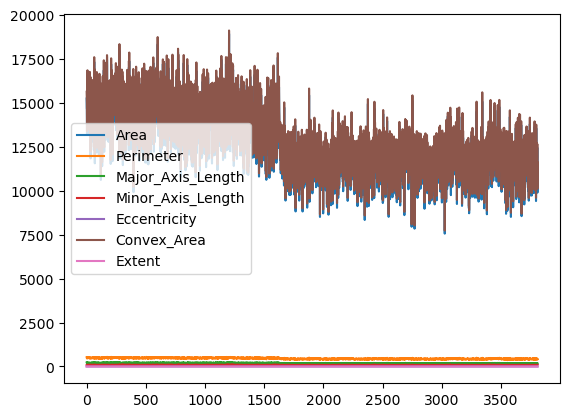

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline 
df.plot()


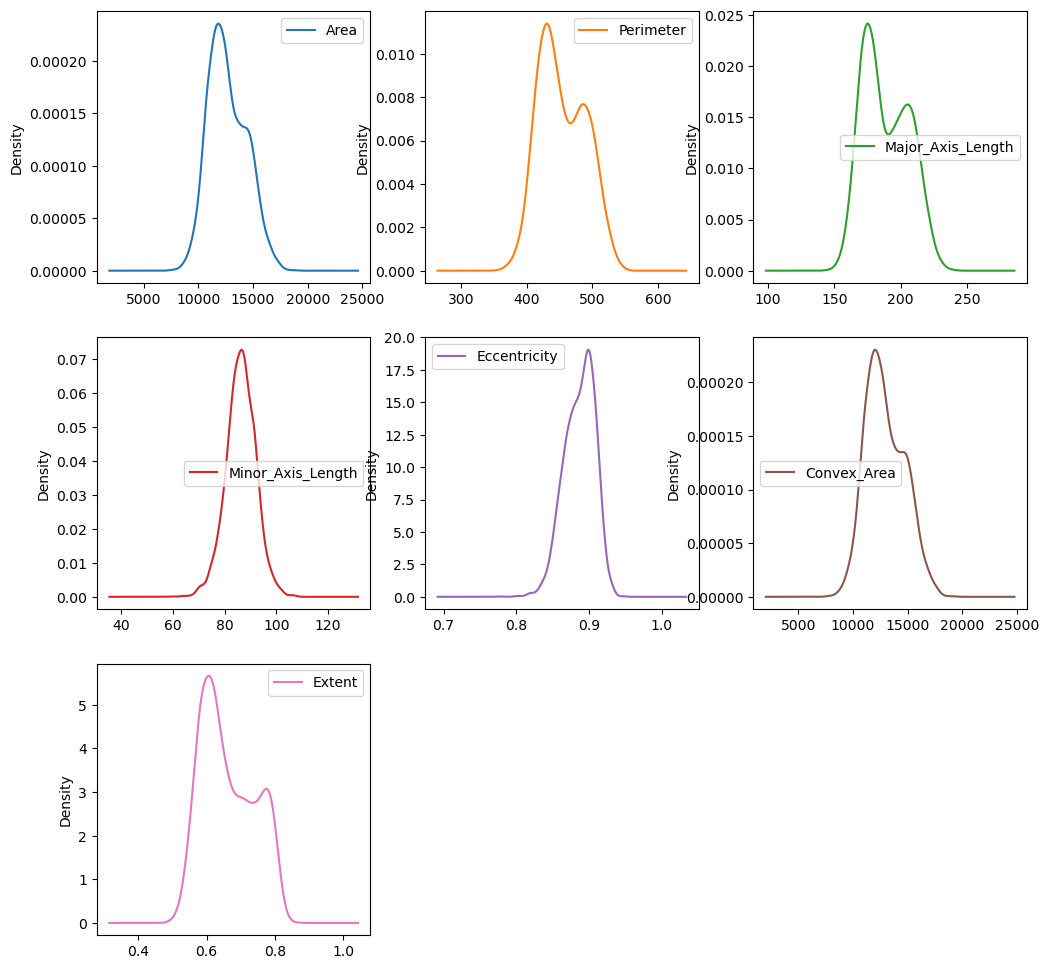

In [43]:
df.plot(kind='density',subplots=True,layout=(3,3),figsize=(12,12),sharex=False) 
plt.show()

In [44]:
df['Extent'].value_counts()

Extent
0.739130    2
0.588235    2
0.605475    2
0.658327    2
0.694695    2
           ..
0.570127    1
0.695659    1
0.601108    1
0.589005    1
0.802949    1
Name: count, Length: 3804, dtype: int64

In [47]:
class_mapper = {b'Cammeo':1,b'Osmancik':0}
df['Class']=df['Class'].replace(class_mapper)


In [48]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,1
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,1
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,1
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,1
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,1
...,...,...,...,...,...,...,...,...
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,0
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,0
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,0
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,0


<Axes: xlabel='Class', ylabel='Area'>

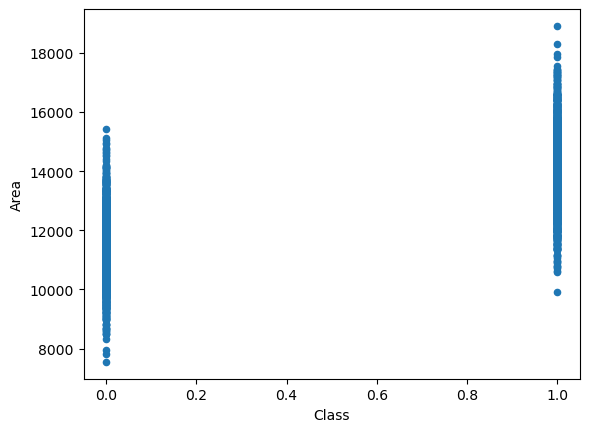

In [49]:
df.plot.scatter(y='Area',x='Class')

<Axes: xlabel='Class', ylabel='Perimeter'>

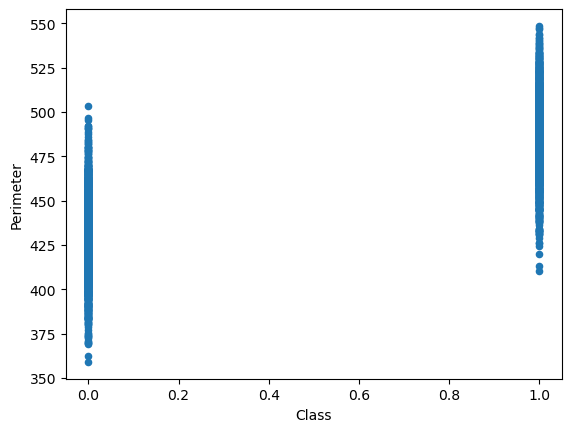

In [50]:
df.plot.scatter(y='Perimeter',x='Class')

0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

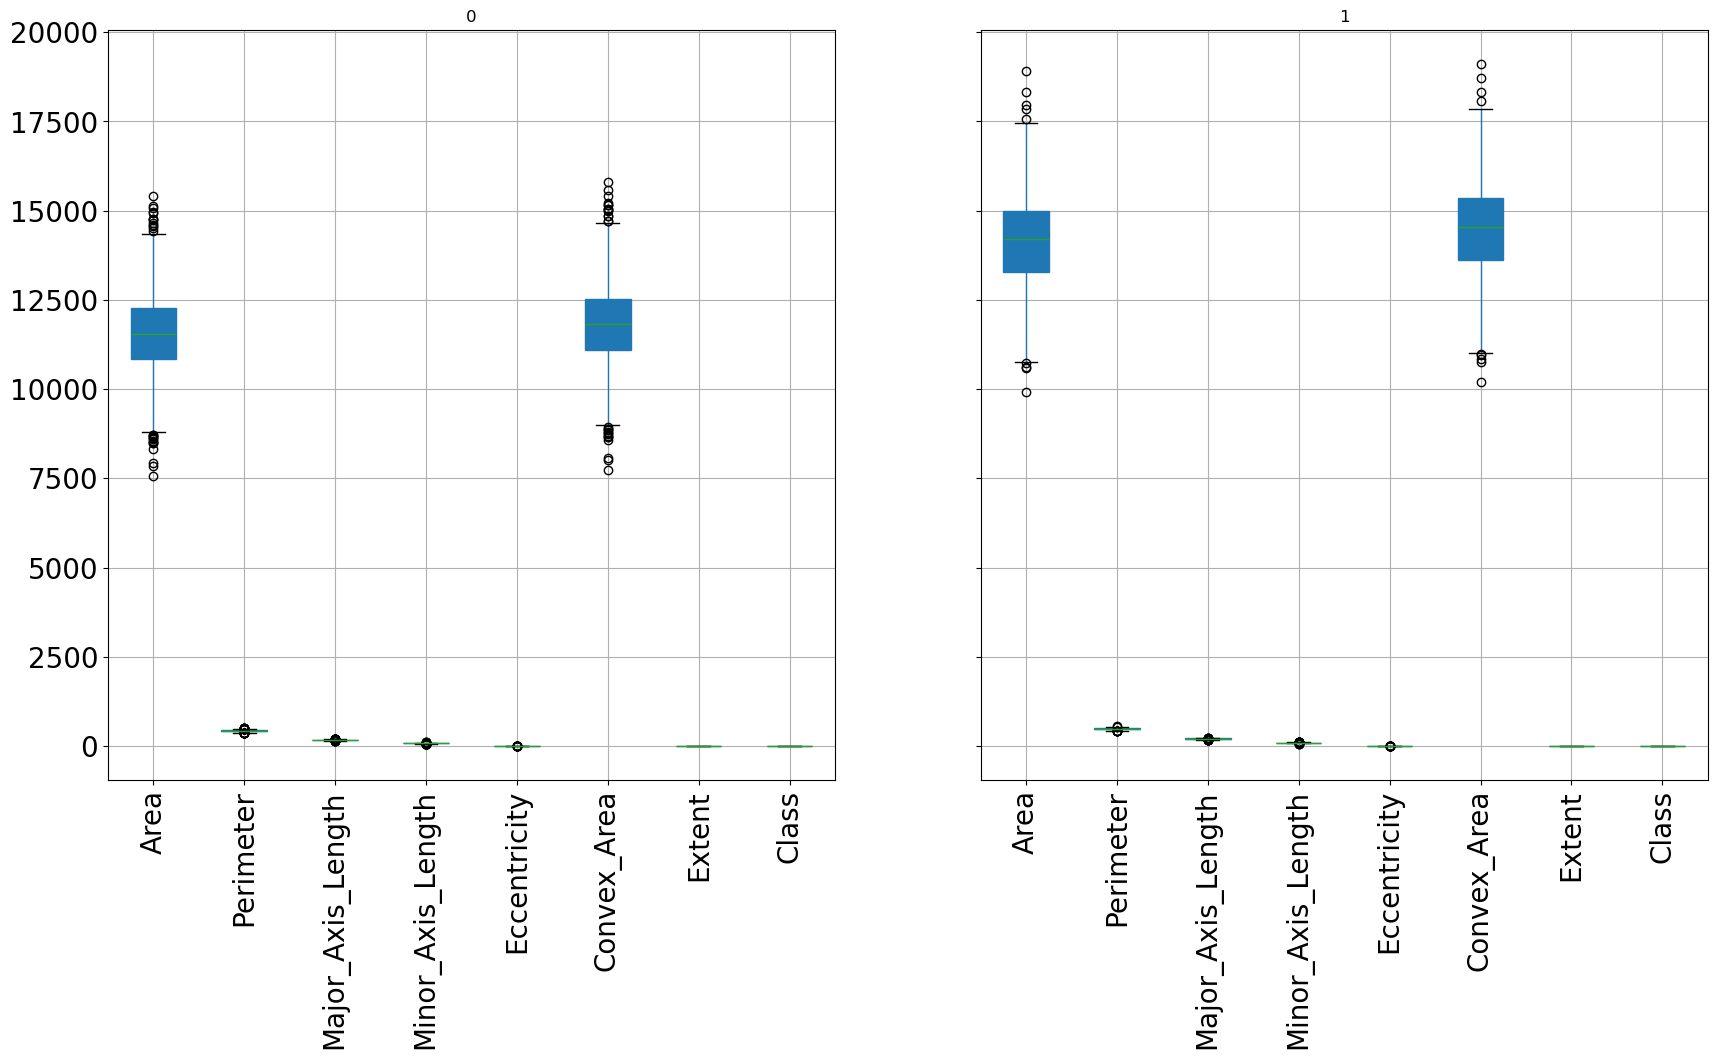

In [51]:
df.groupby('Class').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

In [52]:
corr_matrix = df.corr()
corr_matrix["Class"].sort_values(ascending=False)


Class                1.000000
Major_Axis_Length    0.827824
Perimeter            0.806572
Convex_Area          0.750424
Area                 0.746400
Eccentricity         0.588916
Minor_Axis_Length    0.370355
Extent              -0.117727
Name: Class, dtype: float64

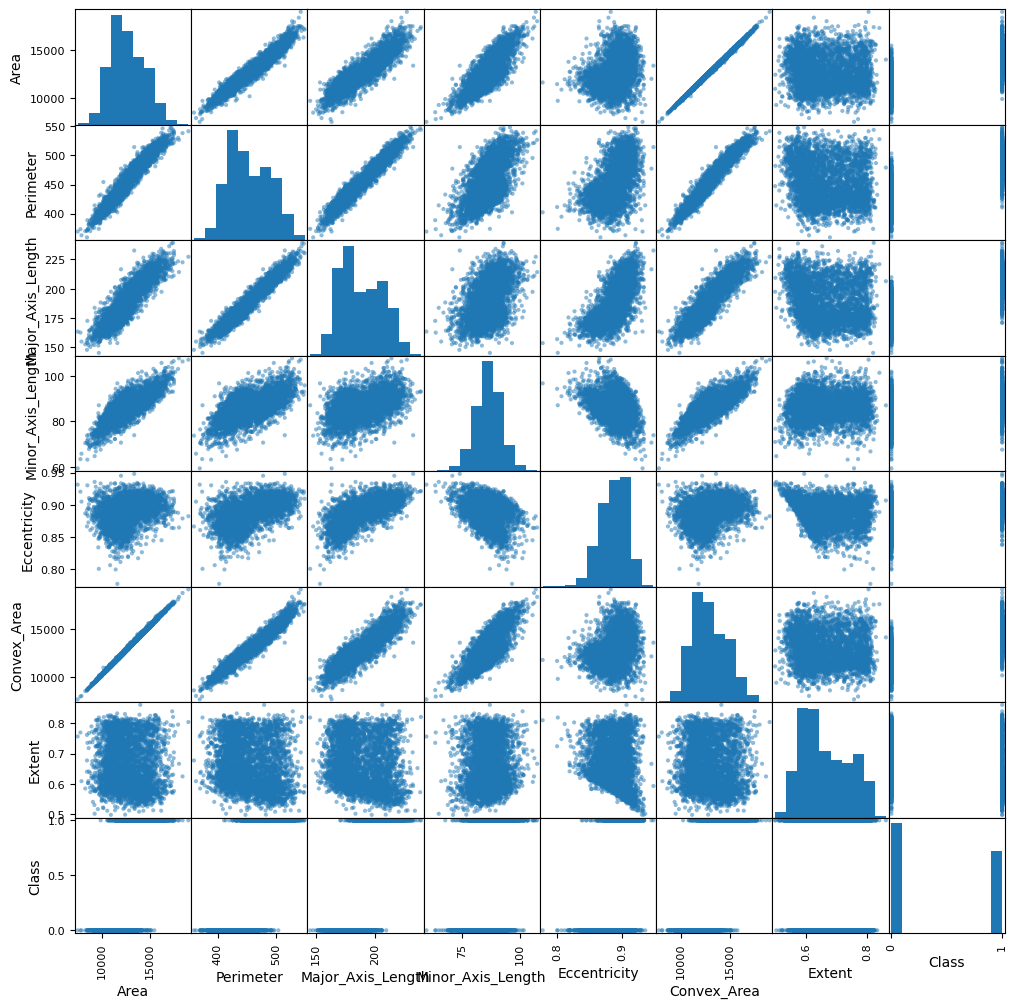

In [53]:
pd.plotting.scatter_matrix(df,figsize=(12,12)) 
plt.show()

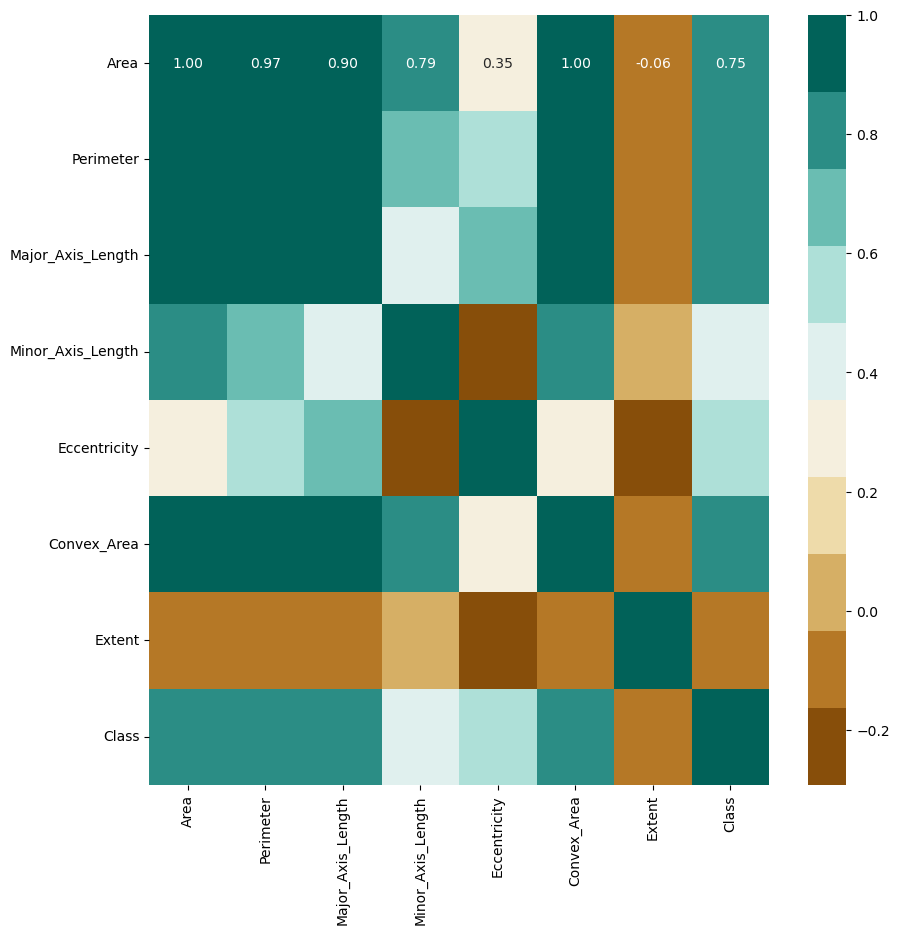

In [56]:
import seaborn as sns
## Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
# colormap = sns.diverging_palette(220, 10, as_cmap=True)
colormap = sns.color_palette("BrBG", 10)
# Generate Heat Map, allow annotations and place floats in map 
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f") #ax.set_yticklabels(column_names);
plt.show()
